# attempt 2

something weird is happending with my y values in attempt 1 that is throwing off the calc not really sure what is is so im going to keep my code all in one code block this time so im not overwriting vars

In [2]:
%%capture output
%pip install numpy
%pip install matplotlib
%pip install math

(10, 10) (10, 10)
(10, 10)
(10,)
[-0.28219267]
sum y[0.3735832]
m_hat: [-0.18111663]


ValueError: x and y must have same first dimension, but have shapes (10, 1) and (1,)

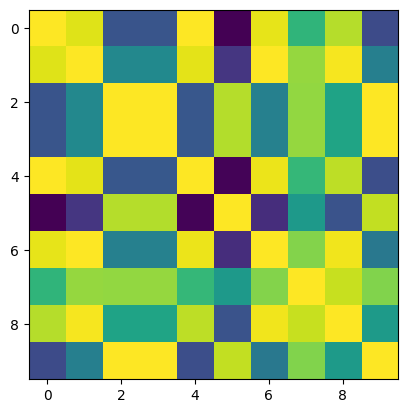

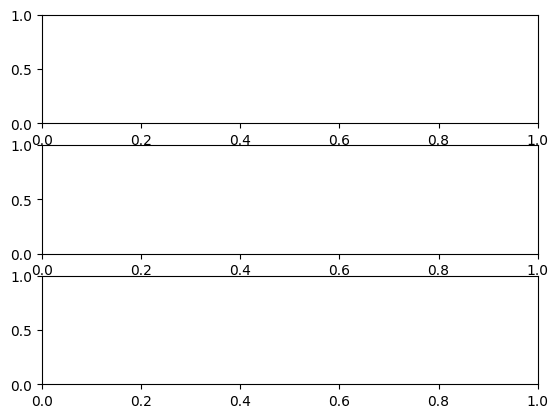

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

def some_unknown_function(X):
    return np.sin(X)

def gauss_corr(l, a_vec, b_vec):
    # a and b are points they could be scalar or vector
    exponent = 0

    # i actually don't think i should be adding the exponent
    for a,b in zip(a_vec, b_vec):
        exponent += -(1/2*l)*(a-b)**2
        
    return (math.e)**exponent

#this sends of x1x1 x1x2 and so on to the guass_corr calc
# for 1 input x this isn't all that important but higher dims
# will benifit from this expected form [[x1,x2],[x1,x2]]
def gauss_corr_handler(X, l=0.1):
    R = []
    X = np.array(X)
    X_shape = (X.shape)[0]
    R = np.zeros((X_shape,X_shape))
    for i, x_vec_1 in enumerate(X):
        for j, x_vec_2 in enumerate(X):
            R[i][j] = gauss_corr(l,x_vec_1,x_vec_2)
    return R


X = np.random.rand(10)*2*(math.pi)
# makes X the correct shape for the handler
# altho if x goes up in dims this is going to cause issues
# should be (-1,) but then my iterator won't work
X = X.reshape(-1,1)
y = some_unknown_function(X)
R = gauss_corr_handler(X, l=0.1)
plt.imshow(R)

# ok so now we want to find M which for this case should be 
# n*1 bc our output dimension is one and we have n inputs


# R needs to be multiplited by some s_d vector i'm going to
# just use ones but this is a hyperparam that should be tuned

R = np.array(R)

# ok i don't know if s_d should be a vector that i then square
# to get an n by n var matrix, but then surely that would 
# throw off the correlation matrix and mess stuff up vs just a
# single scalar which makes way more sense in terms of the matrix maths
# somewhere else i saw identitity?

s_d = 0.1
sigma_matrix = R+np.identity(R.shape[0])*s_d # should be identitiy fix this make it work
print(R.shape,sigma_matrix.shape)
#uses a 1 by n vector:
one_n = np.ones((sigma_matrix.shape)[0])
# odn't put -1,1 leave second one black otherwise a lot of mat
# maths in numpy doesn't work
one_n_transpose = one_n.reshape(-1,)
sigma_matrix_inv = np.linalg.inv(sigma_matrix)
print(sigma_matrix_inv.shape)
print(one_n_transpose.shape)

# print below showd that the above code is correct
# print(one_n ,one_n_transpose)
y = y.reshape(-1,1)
# print(y.shape)
# a/b = a*(b**-1)

M_denom_step = np.matmul(one_n_transpose,sigma_matrix_inv)
M_denom = np.matmul(M_denom_step,one_n)

M_hat_step_1 = np.matmul(one_n_transpose,sigma_matrix_inv)
M_hat_step_2 = np.matmul(M_hat_step_1,y)

try:
    M_denom_inv = np.linalg.inv(M_denom)
    M_hat = np.matmul(M_hat_step_2,M_denom_inv)
except:
    print(M_hat_step_2)
    M_hat = M_hat_step_2/M_denom

print(f'sum y:{sum(y)}')

# this np.matmul(a,b,c) can't be overloaded with more matricies c defined the output so the output is written to C ffs

# the values of M_hat are way too big idk if this is an issue
# with my heyperparameter selection, or whether it is something 
# else like my maths actually being wrong
print(f'm_hat: {M_hat}')

# also getting weird plots on X, y which is fine above
# i guess i have messed up the dimensions

# ok something has happened to y? does it happen before or after the training?
fig, ax = plt.subplots(3)
ax[0].plot(X,M_hat,'o')
ax[1].plot(X,y,'o')
ax[2].plot(X,some_unknown_function(X),'o')

plt.show()


print(some_unknown_function(X))


so the problem is related to the standard deviation 0 makes y random and a small value makes y have smaller period while sticking close to a sine wave not really sure were but i must be making, i think the problem is the try except catch?????